### Students: 
* Mattes Ohse   (337356)
* Florian Ebert (391837)
* Rodrigo Alexis Pardo Meza 
* Bertty Contreras Rojas


<div style="color:red">
    <strong>NOTE:</strong> Some result are different from the original "PDF answer" because the input it's different and the PCA is so sensible to changes in the input
</div>

In [1]:
import numpy as np
import sklearn,sklearn.datasets,utils
%matplotlib inline

# Principal Component Analysis

In this exercise, we will experiment with two different techniques to compute the PCA components of a dataset:

* **Standard PCA**: The standard technique based on eigenvalue decomposition.

* **Iterative PCA**: A technique that iteratively optimizes the PCA objective.

We consider a random subset of the Labeled Faces in the Wild (LFW) dataset, readily accessible from sklearn, and we apply some basic preprocessing to discount strong variations of luminosity and contrast.

In [2]:
X = sklearn.datasets.fetch_lfw_people(resize=0.5)['images']
X = X[np.random.mtrand.RandomState(1).permutation(len(X))[:150]]*1.0
X = X - X.mean(axis=(1,2),keepdims=True)
X = X / X.std(axis=(1,2),keepdims=True)
print(X.shape)

(150, 62, 47)


Two functions are provided for your convenience and are available in `utils.py` that is included in the zip archive. The functions are the following:

* **`utils.scatterplot`** produces a scatter plot from a two-dimensional data set.

* **`utils.render`** takes an array of data points or objects of similar shape, and renders them in the IPython notebook.

Some demo code that makes use of these functions is given below.

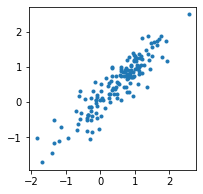

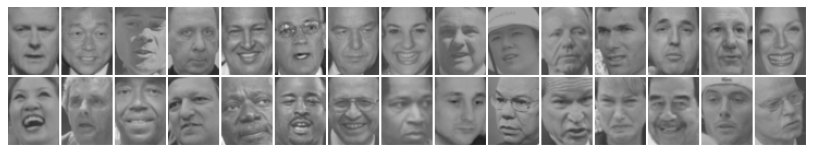

In [3]:
utils.scatterplot(X[:,32,20],X[:,32,21]) # Plot relation between adjacent pixels
utils.render(X[:30],15,2,vmax=5)         # Display first 10 examples in the data

## PCA with Eigenvalue Decomposition (15 P)

Principal components can be found by solving the eigenvalue problem

$$
S \boldsymbol{w} = \lambda \boldsymbol{w}.
$$

where  $S = \sum_{k=1}^N (\boldsymbol{x}_k - \boldsymbol{m}) (\boldsymbol{x}_k - \boldsymbol{m})^\top$ is the scatter matrix, and where $\boldsymbol{m} = \frac1N \sum_{k=1}^N \boldsymbol{x}_k$ is the mean vector.

**Tasks:**

* **Compute the principal components of the data using the function `numpy.linalg.eigh`.**
* **Measure the computational time required to find the principal components. Use the function `time.time()` for that purpose. Do *not* include in your estimate the computation overhead caused by loading the data, plotting and rendering.**
* **Plot the projection of the dataset on the first two principal components using the function `utils.scatterplot`.**
* **Visualize the 60 leading principal components using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, there may be some error in your implementation.

In [4]:
import time
import matplotlib.pyplot as plt

In [5]:
class PCA_eighvalue:
    #size of dimension
    n_dimension = 0
    
    #number of data points to be process
    n_data_point = 0
    
    #original data
    x = None
    
    #Mean vector of the data
    mean_vector = None
    
    #subtract between X and the mean
    sub_x_mean = None
    
    #the S matrix that will use in the ecuation Sw = (\lambda)w
    s_matrix = None
    
    #way of calculate the S matrix
    s_type = 'scatter_matrix'
    
    #eigh value obtained from the S matrix
    eigh_value = None
    
    #All the eigh vectors obtained from the S matrix 
    #one column is one vector
    eigh_vect_full = None
    
    #top eigh values that will be used to calculate the convertions
    eigh_vect_current = None
    
    #The matrix expeted is (N(x?)+) where N is the number of datapoint and x? dimension that data and 
    #thus will be flatten in a vector style
    def __init__(self, X):
        if(len(X.shape) > 2):
            final_dimension = 1
            for i in range(1, len(X.shape)):
                final_dimension *= X.shape[i]
            self.x = X.reshape([X.shape[0], final_dimension]).T
        else:
            self.x = X.T
            
        self.n_dimension = self.x.shape[0]
        self.n_data_point = self.x.shape[1]

    #calculate the mean vector to calculate the next matrix
    def calculate_mean_vector(self):        
        self.mean_vector = self.x.mean(axis = 1).reshape([self.n_dimension, 1])
        return self.mean_vector
        
    #calculate the diffence between the the X_i and the Mean
    def calculate_diff_x(self):
        self.sub_x_mean = self.x - self.mean_vector
        return self.sub_x_mean
    
    #calculate the scatter_matrix using 
    def scatter_matrix(self):
        scatter = np.zeros([self.n_dimension, self.n_dimension])
        for x_tmp in self.sub_x_mean.T:
            x_k = x_tmp.reshape([self.n_dimension,1])
            scatter += np.matmul(x_k, x_k.T)
        return scatter
    
    #calculate the cov_matrix using the original data 
    def cov_matrix(self):
        return np.cov(self.x)
    
    #calculate the s_matrix using the scatter_matrix or cov_matrix depends on the s_type
    def calculate_S_matrix(self, s_type='scatter_matrix'):
        self.s_matrix = getattr(self, s_type)()
        return self.s_matrix
    
    #calculte the eigh vector of s_matrix using np.linalg.eigh 
    def calculate_eigh(self):
        value, vector = np.linalg.eigh(self.s_matrix)
        self.eigh_vect_full = np.flip(vector, axis=1) # Use indices on eigv vectors to organize the matrix
        return self.eigh_vect_full
       
    # validate and plot if everything looks ok
    def validate(self):
        cov = self.cov_matrix()
        value_c, vector_c = LA.eigh(cov)
        idx = value_c.argsort()[::-1] # Sort descending and get sorted indices
        value_c = value_c[idx] # Use indices on eigv vector
        vector_c = vector_c[:,idx] # 
        proportion = np.mean(self.s_matrix/cov)
        
        np.testing.assert_array_almost_equal(proportion, self.n_data_point - 1 )

        # Calculate the variance explained on each of those components
        variance_explained = np.array([(i/sum(self.eigh_value))*100 for i in self.eigh_value])
        # Calculate the cumulative sum of variance explained
        cumulative_variance_explained = np.cumsum(variance_explained)
        plt.style.use("ggplot")
        plt.rcParams["figure.figsize"] = (12,8)
        plt.plot(np.arange(0, cumulative_variance_explained.shape[0]), cumulative_variance_explained)
        plt.show()
        plt.style.use("ggplot")
        plt.rcParams["figure.figsize"] = (12,8)
        plt.plot(np.arange(0, variance_explained.shape[0]), variance_explained)
        plt.show()
        return
        
    # Get the first N eighvector that is the reduce dimision matrix
    def get_submatrix_eigh(self, first, last):
        self.eigh_vect_current = self.eigh_vect_full[:, first:last]
        return self.eigh_vect_current
        
    def get_top_eigh(self, top=60):
        return self.get_submatrix_eigh(first=0, last=top)
    
    def get_n_eigh(self, index):
        return self.get_submatrix_eigh(first=index, last=index+1)
        
    # calculate the projection in the reduced space X^_n = W^T * (X_n − mean(X)), W is the eighvector
    def calculate_projection(self, W, sub_x_mean):
        return  np.matmul(W.T, sub_x_mean)
    
    #do the reconstruction of the data to be use 
    def reconstruction(self, W, projection):
        return np.matmul(W, projection) + self.mean_vector
    
    #plot all the images that are in the matrix     
    def plot_all_image(self, matrix, rows=10, columns=15, vmax=5):
        utils.render(matrix,columns,rows,vmax=vmax)  
        return
        
    #plot the principal components as image
    def plot_pca(self, rows=4, columns=15):
        self.plot_all_image(self.eigh_vect_current.T, rows, columns, vmax=0.1)
        
    #plot the projection of the 2 first pca
    def plot_projection(self):
        W = self.get_top_eigh(top=2)
        x_k = self.sub_x_mean
        projection = self.calculate_projection(W, x_k)
        utils.scatterplot(projection[0], projection[1], xlabel='PCA 1',ylabel='PCA 2')
        
    def execute(self):
            
        before = time.time()
        #calculate some values that are using the lifecycle of the PCA algorithm
        self.calculate_mean_vector()
        self.calculate_diff_x()
        self.calculate_S_matrix(self.s_type)
        self.calculate_eigh()
        print((time.time() - before))
        #self.validate()
       
        self.plot_projection()

        self.get_top_eigh(top=60)
        self.plot_pca()
        
        return 
        
        

        
        
    def __str__(self):
        return ('dimensions: {0}\n' + 
                'data_points: {1}\n' + 
                'X_shape: {2}\n' +
                'mean_vector: {3}\n' +
                'sub_x_mean: {4}\n' +
                'S matrix: {5}\n' +
                'eigh values: {6}\n' +
                'eigh vectors: {7}\n'
                ).format(
                self.n_dimension, 
                self.n_data_point, 
                self.x.shape,
                self.mean_vector.shape,
                self.sub_x_mean.shape,
                self.s_matrix.shape,
                self.eigh_value.shape,
                self.eigh_vect_full.shape
                )

5.0765380859375


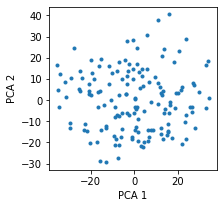

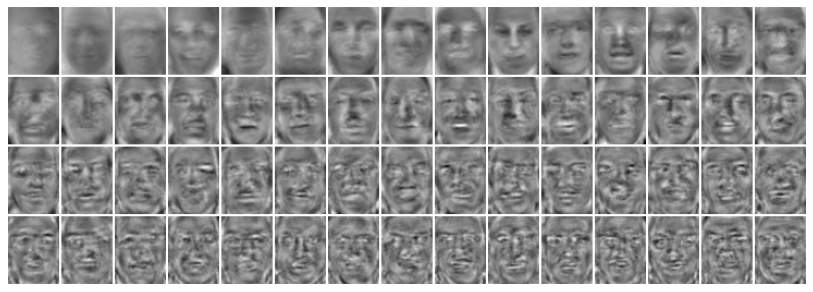

In [6]:
pca_ = PCA_eighvalue(X)
pca_.execute()

5.15985894203186


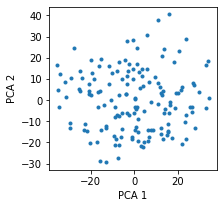

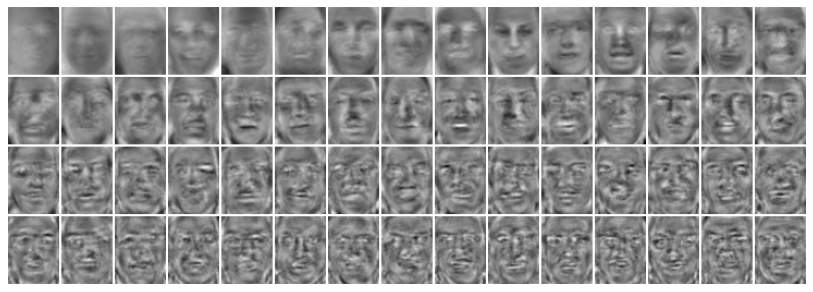

In [24]:
def getS(X):
    X_prima = X.reshape([X.shape[0], X.shape[1]*X.shape[2]])

    M = X_prima.mean(axis=0)

    X_diff = X_prima - M

    length = M.shape[0]
    S = np.zeros([length, length])
    for X_k in X_diff:
        S += np.matmul(X_k.reshape([length,1]), X_k.reshape([length, 1]).T)

    return S, X_diff
        
before = time.time()

S, X_diff = getS(X)
value, vector = np.linalg.eigh(S)
vector = np.flip(vector, axis=1)

after = time.time()
print(after - before)

projection = np.dot(vector[:, :2].T, X_diff.T)

utils.scatterplot(projection[0],projection[1], xlabel='PCA 1',ylabel='PCA 2')

utils.render(vector[:, :60].T,15,4, vmax=0.1)  



When looking at the scatter plot, we observe that much more variance is expressed in the first two principal components than in individual dimensions as it was plotted before. When looking at the principal components themselves which we render as images, we can see that the first principal components correspond to low-frequency filters that select for coarse features, and the following principal components capture progressively higher-frequency information and are also becoming more noisy.

## Iterative PCA (15 P)

The standard PCA method based on eigenvalues is quite expensive to compute. Instead, the power iteration algorithm looks only for the first component and finds it using an iterative procedure. It starts with an initial weight vector $\boldsymbol{w}$, and repeatedly applies the update rule

$$
\boldsymbol{w} \leftarrow S \boldsymbol{w} \,\big/\, \|S \boldsymbol{w}\|.
$$

Like for standard PCA, the objective that iterative PCA optimizes is $J(\boldsymbol{w}) = \boldsymbol{w}^\top S \boldsymbol{w}$ subject to the unit norm constraint for $\boldsymbol{w}$. We can therefore keep track of the progress of the algorithm after each iteration.

**Tasks:**

* **Implement the iterative PCA algorithm. Use as a stopping criterion the value of $J(\boldsymbol{w})$ between two iterations increasing by less than one.**
* **Print the value of the objective function $J(\boldsymbol{w})$ at each iteration.**
* **Measure the time taken to find the principal component.**
* **Visualize the the eigenvector $\boldsymbol{w}$ obtained after convergence using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, there may be some error in your implementation.

0.09784603118896484


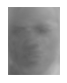

In [31]:

def J_w(S, w):
    return w.T.dot(S.dot(w))
    
    

def power_iteration(S):
    n, d = S.shape
    w = np.ones(d) / np.sqrt(d)
    J_w_previous = J_w(S, w)
    i = 0
    while True: 
        #print('iteration  {0}   J(w) = {1}'.format(i, J_w_previous))
        i += 1
        
        Sw = S.dot(w)
        mu = np.linalg.norm(Sw)
        w = Sw / mu
        J_w_current = J_w(S, w)
        
        if(np.abs(J_w_previous - J_w_current) < 1):
            return w, J_w_current
        else:
            J_w_previous = J_w_current

        
    

S, _ = getS(X)
before = time.time()
vector, value = power_iteration(S)
print(time.time() - before)

utils.render(vector, 1, 1, vmax=0.1)  

We observe that the computation time has decreased significantly. The difference of performance becomes larger as the number of dimensions increases. We can observe that the principal component is the same (sometimes up to a sign flip) as the one obtained by standard PCA.